In [1]:
import platform
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from Detector_Classes.M3RefTracking import M3RefTracking
from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

from det_classes_test import plot_ray_hits_2d, align_dream, get_residuals, get_efficiency, get_residuals_subdets_with_err, get_rays_in_sub_det_vectorized, get_rays_in_sub_det, get_raw_residuals, get_circle_scan, plot_2D_circle_scan

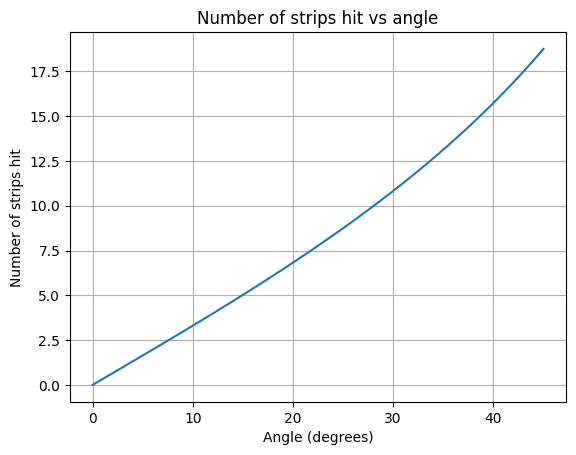

In [2]:
drift_gap = 30  # mm
strip_pitch = 0.8 * 2  # mm
angles = np.linspace(0, np.pi / 4, 1000)

strips_hit = drift_gap * np.tan(angles) / strip_pitch

fig, ax = plt.subplots()
ax.plot(np.rad2deg(angles), strips_hit, linestyle='-')
ax.set_xlabel('Angle (degrees)')
ax.set_ylabel('Number of strips hit')
ax.set_title('Number of strips hit vs angle')
ax.grid()

In [3]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dylan-MS-7C84':
    base_dir = '/media/ucla/Saclay/cosmic_data/'
    det_type_info_dir = '/home/dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/media/ucla/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dphnpct50.extra.cea.fr':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 5  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'urw_stats_10-31-24'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'long_run'

det_single = 'urw_inter'

file_nums = list(range(0, 45))
# file_nums = list(range(0, 109))
# file_nums = 'all'

noise_sigma = 8

realign_dream = True  # If False, read alignment from file, if True, realign Dream detector

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'
alignment_dir = f'{run_dir}alignments/'

z_align_range = [5, 5]  # mm range to search for optimal z position

try:
    os.mkdir(alignment_dir)
except FileExistsError:
    pass
try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [4]:
print(f'Getting ray data...')
ray_data = M3RefTracking(m3_dir, single_track=True, file_nums=file_nums)

Getting ray data...


100%|██████████| 237/237 [00:03<00:00, 66.00it/s]


In [5]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [6]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')
det.load_dream_data(data_dir, ped_dir, noise_sigma, file_nums, chunk_size, save_waveforms=False, waveform_fit_func='parabola_vectorized')
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 600, 'resist_1': 410}
Reading in data...


100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


Read in data shape: (10635, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 17.76it/s]


Fitting time: 0.43889832496643066 s
Processed sub-chunk 1/1
Processed chunk 1/9


100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Read in data shape: (10697, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 18.18it/s]


Fitting time: 0.5095596313476562 s
Processed sub-chunk 1/1
Processed chunk 2/9


100%|██████████| 5/5 [00:06<00:00,  1.26s/it]


Read in data shape: (10772, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 16.11it/s]


Fitting time: 0.5868134498596191 s
Processed sub-chunk 1/1
Processed chunk 3/9


100%|██████████| 5/5 [00:05<00:00,  1.02s/it]


Read in data shape: (10654, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 17.63it/s]


Fitting time: 0.5948448181152344 s
Processed sub-chunk 1/1
Processed chunk 4/9


100%|██████████| 5/5 [00:06<00:00,  1.23s/it]


Read in data shape: (10919, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 17.47it/s]


Fitting time: 0.6570229530334473 s
Processed sub-chunk 1/1
Processed chunk 5/9


100%|██████████| 5/5 [00:06<00:00,  1.30s/it]


Read in data shape: (10847, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 18.26it/s]


Fitting time: 0.6507575511932373 s
Processed sub-chunk 1/1
Processed chunk 6/9


100%|██████████| 5/5 [00:07<00:00,  1.51s/it]


Read in data shape: (10758, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 18.32it/s]


Fitting time: 0.6933917999267578 s
Processed sub-chunk 1/1
Processed chunk 7/9


100%|██████████| 5/5 [00:07<00:00,  1.55s/it]


Read in data shape: (10757, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 18.74it/s]


Fitting time: 0.730048656463623 s
Processed sub-chunk 1/1
Processed chunk 8/9


100%|██████████| 5/5 [00:09<00:00,  1.81s/it]


Read in data shape: (10795, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 14.13it/s]


Fitting time: 0.8723678588867188 s
Processed sub-chunk 1/1
Processed chunk 9/9
Getting hits...
Hits shape: (96834, 256)


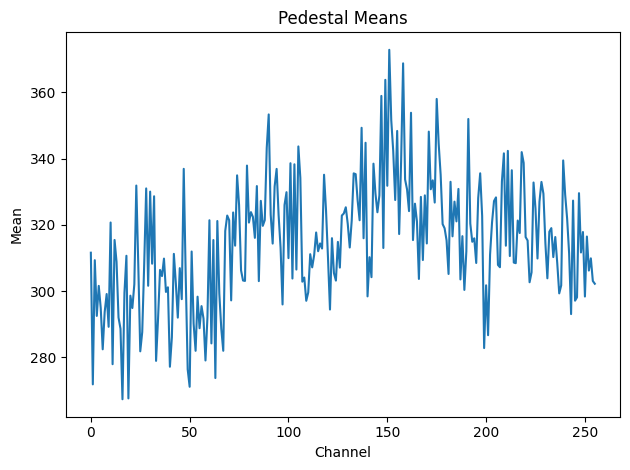

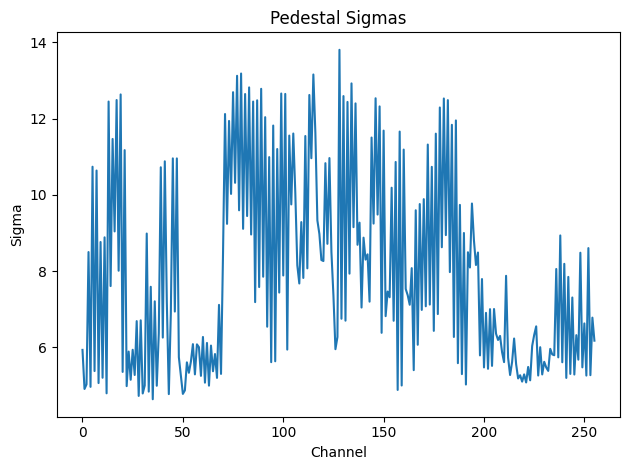

In [7]:
det.dream_data.plot_pedestals()

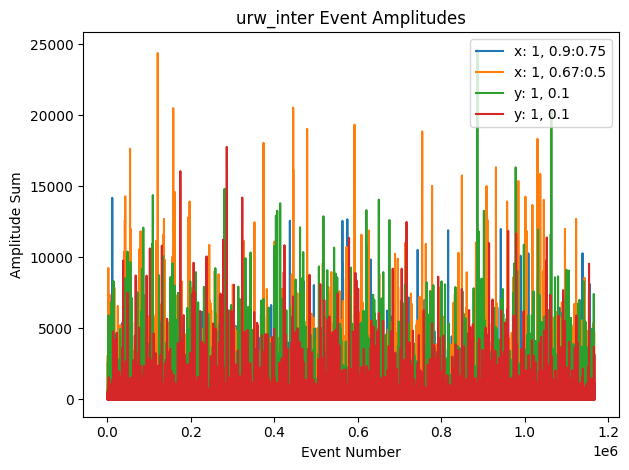

In [8]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

if realign_dream:
    det.add_rotation(90, 'z')

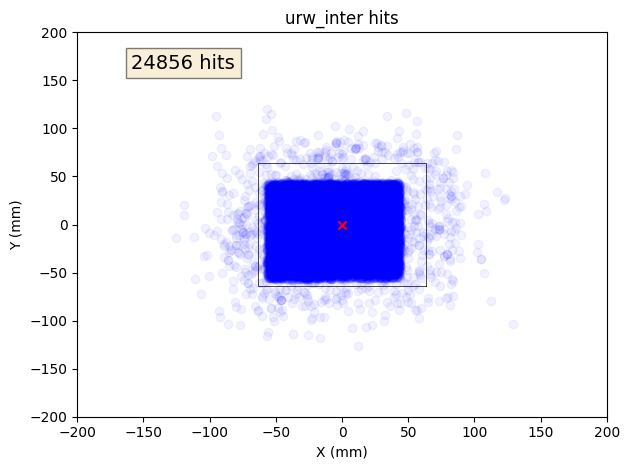

In [9]:
plot_ray_hits_2d(det, ray_data)

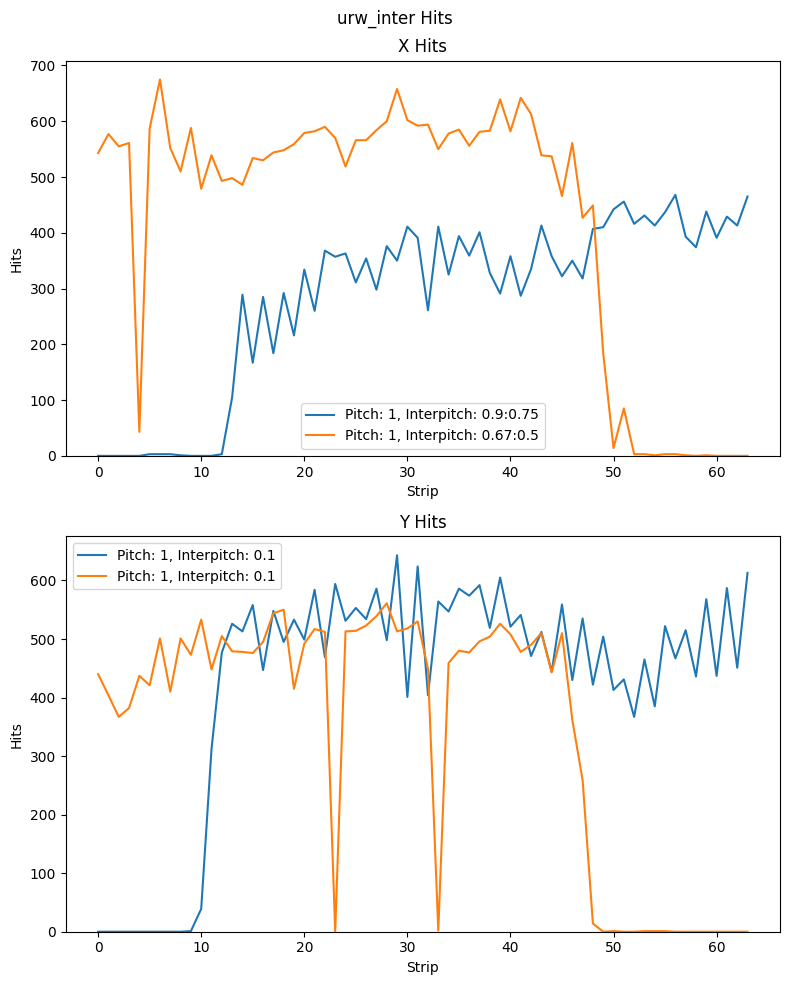

In [10]:
det.plot_hits_1d()

In [11]:
print(len(det.dream_data.hits))

96834


z: 697.0
z: 697.3448275862069
z: 697.6896551724138
z: 698.0344827586207
z: 698.3793103448276
z: 698.7241379310345
z: 699.0689655172414
z: 699.4137931034483
z: 699.7586206896551
z: 700.1034482758621
z: 700.448275862069
z: 700.7931034482758
z: 701.1379310344828
z: 701.4827586206897
z: 701.8275862068965
z: 702.1724137931035
z: 702.5172413793103
z: 702.8620689655172
z: 703.2068965517242
z: 703.551724137931
z: 703.8965517241379
z: 704.2413793103449
z: 704.5862068965517
z: 704.9310344827586
z: 705.2758620689655
z: 705.6206896551724
z: 705.9655172413793
z: 706.3103448275862
z: 706.6551724137931
z: 707.0
z_rot: -1.0
z_rot: -0.9310344827586207
z_rot: -0.8620689655172413
z_rot: -0.7931034482758621
z_rot: -0.7241379310344828
z_rot: -0.6551724137931034
z_rot: -0.5862068965517242
z_rot: -0.5172413793103449
z_rot: -0.4482758620689655
z_rot: -0.3793103448275862
z_rot: -0.31034482758620685
z_rot: -0.24137931034482762
z_rot: -0.1724137931034483
z_rot: -0.10344827586206895
z_rot: -0.034482758620689724
z

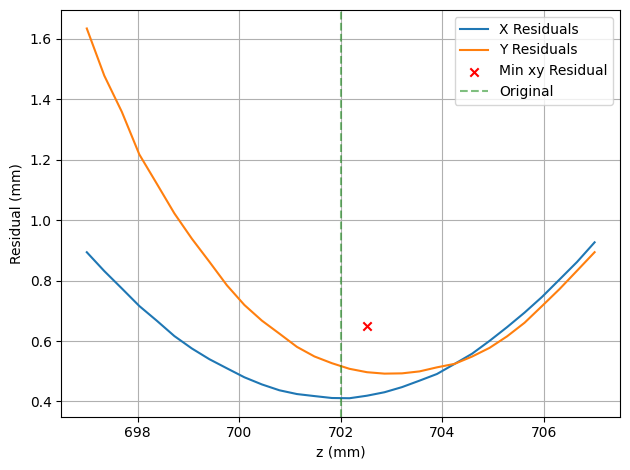

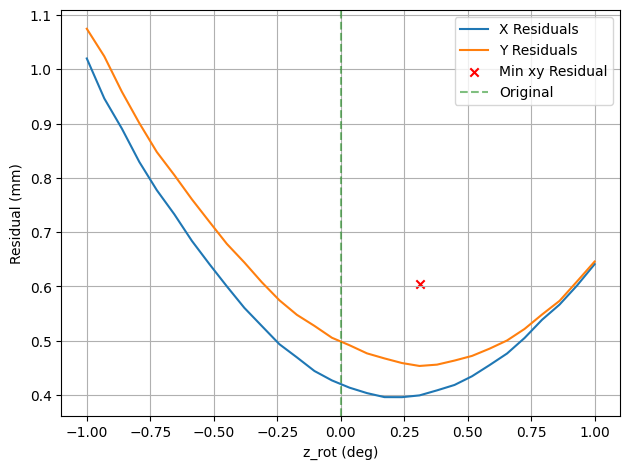

In [12]:
z_orig = det.center[2]
x_bnds = det.center[0] - det.size[0] / 2, det.center[0] + det.size[0] / 2
y_bnds = det.center[1] - det.size[1] / 2, det.center[1] + det.size[1] / 2
ray_traversing_triggers = ray_data.get_traversing_triggers(z_orig, x_bnds, y_bnds, expansion_factor=0.1)

alignment_file = f'{alignment_dir}{det.name}_alignment.txt'
if realign_dream:
    align_dream(det, ray_data, z_align_range)
    det.write_det_alignment_to_file(alignment_file)
else:
    det.read_det_alignment_from_file(alignment_file)

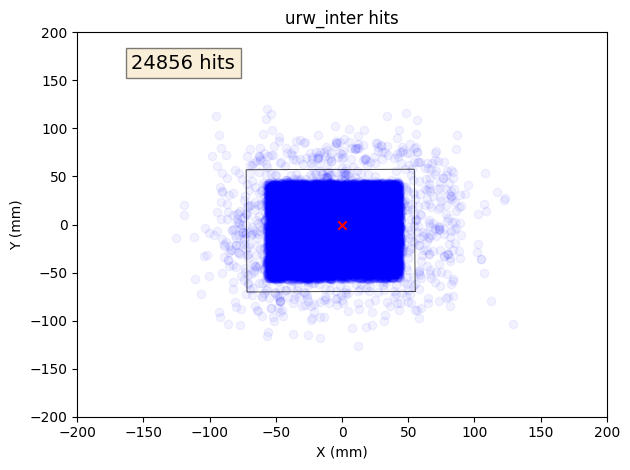

In [13]:
plot_ray_hits_2d(det, ray_data)

In [14]:
for sub_det in det.sub_detectors:
    print(sub_det.x_pitch, sub_det.y_pitch)

1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0


Text(0.5, 0, 'Ray Y Angles')

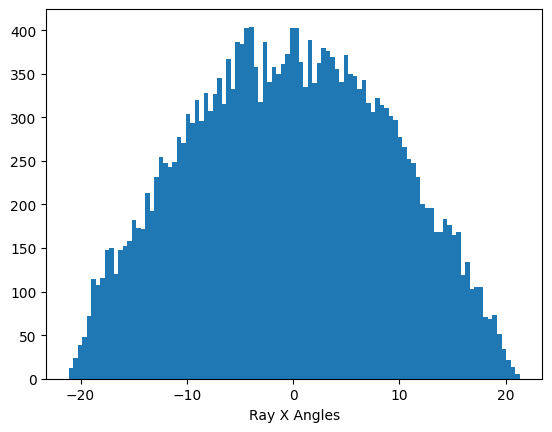

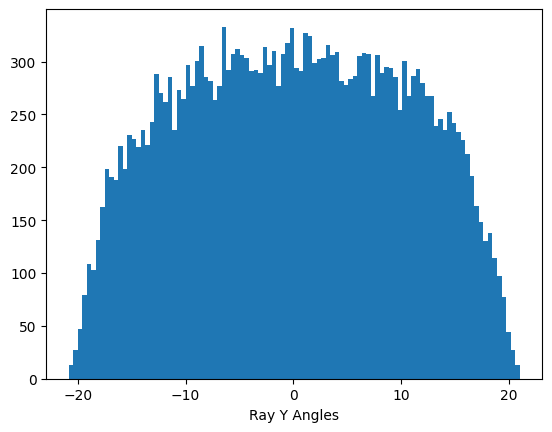

In [15]:
all_x_rays, all_y_rays, all_ray_x_angles, all_ray_y_angles, all_ray_event_nums = [], [], [], [], []

for sub_det in det.sub_detectors:
    event_nums_i, centroids_i = sub_det.get_event_centroids()
    event_nums_i = list(event_nums_i)
    x_rays, y_rays, event_num_rays = ray_data.get_xy_positions(det.center[2], event_nums_i)
    x_ray_angles, y_ray_angles, event_num_rays = ray_data.get_xy_angles(event_nums_i)
    all_x_rays.extend(list(x_rays))
    all_y_rays.extend(list(y_rays))
    all_ray_x_angles.extend(list(x_ray_angles))
    all_ray_y_angles.extend(list(y_ray_angles))
    all_ray_event_nums.extend(list(event_num_rays))

df = pd.DataFrame({
    "event_num": all_ray_event_nums,
    "x": all_x_rays,
    "y": all_y_rays,
    "x_angle": all_ray_x_angles,
    "y_angle": all_ray_y_angles,
})

df = df.drop_duplicates(subset="event_num")

# Get back lists
all_ray_event_nums = df["event_num"].tolist()
all_x_rays = df["x"].tolist()
all_y_rays = df["y"].tolist()
all_ray_x_angles = df["x_angle"].tolist()
all_ray_y_angles = df["y_angle"].tolist()

fig_x_angles, ax_x_angles = plt.subplots()
ax_x_angles.hist(np.rad2deg(all_ray_x_angles), bins=100)
ax_x_angles.set_xlabel('Ray X Angles')

fig_y_angles, ax_y_angles = plt.subplots()
ax_y_angles.hist(np.rad2deg(all_ray_y_angles), bins=100)
ax_y_angles.set_xlabel('Ray Y Angles')

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
(96834, 256)
[0 0 0 ... 1 0 0]


Text(0.5, 0, 'Hits per Event')

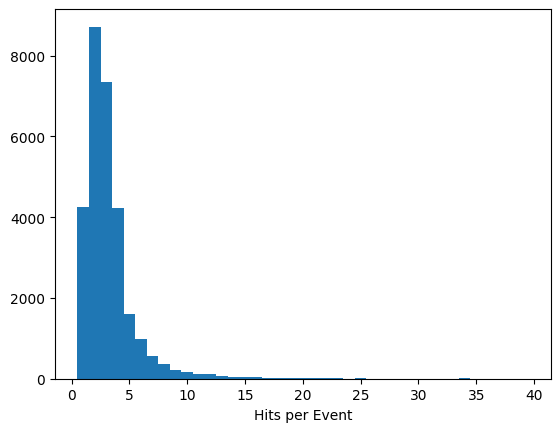

In [16]:
print(det.dream_data.fit_params['amplitude'])
print(det.dream_data.fit_params['amplitude'].shape)
hits_per_event = np.sum(~np.isnan(det.dream_data.fit_params['amplitude']), axis=1)
print(hits_per_event)

fig, ax = plt.subplots()
ax.hist(hits_per_event, bins=np.arange(0.5, 40.5, 1))
ax.set_xlabel('Hits per Event')

In [17]:
print(det.dream_data.fit_params.keys())

dict_keys(['amplitude', 'time_max', 'success'])


In [18]:
min_hits = 4
hits_mask = hits_per_event >= min_hits

det.dream_data.fit_params['time_max'][hits_mask]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [19]:
all_ray_xy_angles = np.arctan(np.sqrt(np.tan(all_ray_x_angles)**2 + np.tan(all_ray_y_angles)**2))
print(all_ray_xy_angles.shape)
print(hits_per_event.shape)
print(det.dream_data.event_nums.shape)
ray_hit_mask = np.isin(det.dream_data.event_nums, all_ray_event_nums)
print(hits_per_event[ray_hit_mask].shape)

(24199,)
(96834,)
(96834,)
(24199,)


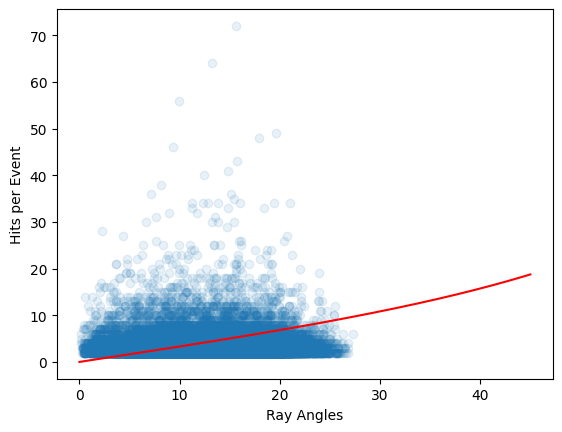

In [20]:
# Plot correlation between ray angle and number of hits
fig, ax = plt.subplots()
ax.scatter(np.rad2deg(all_ray_xy_angles), hits_per_event[ray_hit_mask], alpha=0.1)
ax.set_xlabel('Ray Angles')
ax.set_ylabel('Hits per Event')
ax.plot(np.rad2deg(angles), strips_hit, linestyle='-', color='red')

Text(0, 0.5, 'Hits per Event (integer bins)')

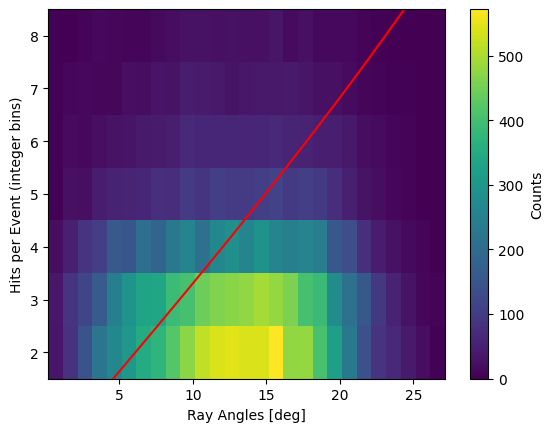

In [21]:
fig, ax = plt.subplots()

# Convert angles to degrees
angles_deg = np.rad2deg(all_ray_xy_angles)
hits = hits_per_event[ray_hit_mask]

# Define bins
angle_bins = np.arange(angles_deg.min(), angles_deg.max(), 1)  # e.g. 1° bins
# hit_bins = np.arange(hits.min(), hits.max() + 2) - 0.5  # integer bins centered on integers
hit_bins = np.arange(hits.min(), 10) - 0.5  # integer bins centered on integers

# 2D histogram
h = ax.hist2d(angles_deg, hits, bins=[angle_bins, hit_bins], cmap='viridis')
ax.plot(np.rad2deg(angles), strips_hit, linestyle='-', color='red')

# Colorbar for counts
fig.colorbar(h[3], ax=ax, label="Counts")

ax.set_xlabel("Ray Angles [deg]")
ax.set_ylabel("Hits per Event (integer bins)")

In [ ]:
get_efficiency(det, ray_data, plot=True, in_det=True, tolerance=0.2, grid_size=2)

In [ ]:
get_residuals(det, ray_data, plot=True, in_det=True, tolerance=0.2)

In [ ]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2)

In [ ]:
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

In [ ]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2, max_r=2)
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

New stuff above

In [ ]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2, max_r=2)
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

In [ ]:
x_rays, y_rays, event_num_rays = ray_data.get_xy_positions(det.center[2])
pitches, x_means, x_errs, y_means, y_errs = [], [], [], [], []
for sub_det in det.sub_detectors:
    x_rays_in, y_rays_in, event_num_rays_in = get_rays_in_sub_det_vectorized(det, det.sub_detectors[sub_det.sub_index], x_rays, y_rays, event_num_rays, tolerance=-2)
    print(f'Rays in sub-detector {sub_det.sub_index}: {len(x_rays_in)}, total rays: {len(x_rays)}')
    x_mean, y_mean, x_err, y_err = sub_det.plot_cluster_sizes(event_nums=event_num_rays_in)
    pitches.append(sub_det.x_interpitch)
    x_means.append(x_mean)
    x_errs.append(x_err)
    y_means.append(y_mean)
    y_errs.append(y_err)

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(pitches, x_means, yerr=x_errs, fmt='o', capsize=5, label='X')
ax.errorbar(pitches, y_means, yerr=y_errs, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Cluster Size (N strips)')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()
ax.plot(pitches, x_means, 'o', label='X')
ax.plot(pitches, y_means, 'o', label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Cluster Size (N strips)')
fig.tight_layout()

In [ ]:
x_res, y_res, x_rays, y_rays = get_raw_residuals(det, ray_data, in_det=True, tolerance=0.0)

In [ ]:
scan_xs = np.linspace(-80, 60, 140 + 1)
scan_ys = np.linspace(-80, 60, 140 + 1)

# Generate mesh grid
x_mesh, y_mesh = np.meshgrid(scan_xs, scan_ys)
xy_pairs = list(zip(x_mesh.ravel(), y_mesh.ravel()))  # Flatten to list of (x, y) pairs
scan_radius = 1
min_events = 30
# res_range = [160, 810]  # μm
# mean_range = [-200, 210]  # μm
res_range = None  # μm
mean_range = None  # μm

scan_resolutions_x, scan_means_x, events_x = get_circle_scan(np.array(x_res), np.array(x_rays), np.array(y_rays), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_resolutions_x, scan_means_x, scan_xs, scan_ys, scan_events=events_x, radius=scan_radius, percentile_filter=(1, 99), conversion_factor=1e3, unit_str='μm', res_title='X (Top) Spatial Resolution', mean_title='X (Top) Mean Residual', res_range=res_range, mean_range=mean_range)

In [ ]:
scan_resolutions_y, scan_means_y, events_y = get_circle_scan(np.array(y_res), np.array(x_rays), np.array(y_rays), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_resolutions_y, scan_means_y, scan_xs, scan_ys, scan_events=events_y, radius=scan_radius, percentile_filter=(1, 99), conversion_factor=1e3, unit_str='μm', res_title='Y (Bottom) Spatial Resolution', mean_title='Y (Bottom) Mean Residual', res_range=res_range, mean_range=mean_range)

In [ ]:
x_res, y_res, x_rays, y_rays = get_raw_residuals(det, ray_data, in_det=True, tolerance=0.0)
scan_radius = 2
min_events = 50
x_rays, y_rays, event_num_rays = ray_data.get_xy_positions(det.center[2])
x_sizes_all, y_sizes_all, x_rays_cluster_sizes, y_rays_cluster_sizes = [], [], [], []
for sub_det in det.sub_detectors:
    x_rays_in, y_rays_in, event_num_rays_in = get_rays_in_sub_det_vectorized(det, det.sub_detectors[sub_det.sub_index], x_rays, y_rays, event_num_rays, tolerance=0)
    x_sizes, y_sizes, ray_mask = sub_det.get_cluster_sizes(largest=True, event_nums=event_num_rays_in, return_ray_mask=True)
    x_sizes_all.extend(x_sizes)
    y_sizes_all.extend(y_sizes)
    x_rays_cluster_sizes.extend(x_rays_in[ray_mask])
    y_rays_cluster_sizes.extend(y_rays_in[ray_mask])
scan_resolutions_csx, scan_means_csx, events_csx = get_circle_scan(np.array(x_sizes_all), np.array(x_rays_cluster_sizes), np.array(y_rays_cluster_sizes), xy_pairs, radius=scan_radius, shape='square', gaus_fit=False, min_events=min_events, plot=False)
plot_2D_circle_scan(scan_resolutions_csx, scan_means_csx, scan_xs, scan_ys, scan_events=events_csx, radius=scan_radius, percentile_filter=(1, 95), plot='mean', unit_str='N strips', mean_title='X Cluster Size')

In [ ]:
scan_resolutions_csy, scan_means_csy, events_csy = get_circle_scan(np.array(y_sizes_all), np.array(x_rays_cluster_sizes), np.array(y_rays_cluster_sizes), xy_pairs, radius=scan_radius, percentile_cuts=(1, 99), shape='square', gaus_fit=False, min_events=min_events, plot=False)
plot_2D_circle_scan(scan_resolutions_csy, scan_means_csy, scan_xs, scan_ys, scan_events=events_csy, radius=scan_radius, percentile_filter=(1, 99), plot='mean', unit_str='N strips', mean_title='Y Cluster Size')

In [ ]:
det.dream_data.correct_for_fine_timestamps()

sigma_x, sigma_x_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=None, plot=True)
plt.title(f'Time of Max for X (Top) Strips')

sigma_y, sigma_y_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=None, plot=True)
plt.title(f'Time of Max for Y (Bottom) Strips')

In [ ]:
min_amp = 600
sigma_x, sigma_x_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=min_amp, plot=True)
plt.title(f'Time of Max for X (Top) Strips Min Amp {min_amp}')

sigma_y, sigma_y_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=min_amp, plot=True)
plt.title(f'Time of Max for Y (Bottom) Strips Min Amp {min_amp}')

In [ ]:
x_time_maxes = det.dream_data.get_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=None, filter_times=False)
x_time_maxes, x_time_filter = det.dream_data.filter_time_maxes(x_time_maxes, return_mask=True)
y_time_maxes = det.dream_data.get_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=None, filter_times=False)
y_time_maxes, y_time_filter = det.dream_data.filter_time_maxes(y_time_maxes, return_mask=True)
time_ray_event_mask_x = np.isin(event_num_rays, det.dream_data.event_nums[x_time_filter])
time_ray_event_mask_y = np.isin(event_num_rays, det.dream_data.event_nums[y_time_filter])
x_rays_timing_x, y_rays_timing_x = x_rays[time_ray_event_mask_x], y_rays[time_ray_event_mask_x]
x_rays_timing_y, y_rays_timing_y = x_rays[time_ray_event_mask_y], y_rays[time_ray_event_mask_y]

In [ ]:
scan_radius = 2
min_events = 100
res_range = [20, 44]  # ns
mean_range = [405, 425]  # ns
scan_time_resolutions_x, scan_time_means_x, events_time_x = get_circle_scan(np.array(x_time_maxes), np.array(x_rays_timing_x), np.array(y_rays_timing_x), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_time_resolutions_x, scan_time_means_x, scan_xs, scan_ys, scan_events=events_time_x, radius=scan_radius, percentile_filter=(1, 99), plot='both', unit_str='ns', res_title='Time Resolution X (Top) Strips', mean_title='Mean Time X (Top) Strips', res_range=res_range, mean_range=mean_range)

In [ ]:
scan_time_resolutions_y, scan_time_means_y, events_time_y = get_circle_scan(np.array(y_time_maxes), np.array(x_rays_timing_y), np.array(y_rays_timing_y), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_time_resolutions_y, scan_time_means_y, scan_xs, scan_ys, scan_events=events_time_y, radius=scan_radius, percentile_filter=(1, 99), plot='both', unit_str='ns', res_title='Time Resolution Y (Bottom) Strips', mean_title='Mean Time Y (Bottom) Strips', res_range=res_range, mean_range=mean_range)

In [ ]:
edge_cushion = 5 # mm
det_z = det.center[2]
for sub_det in det.sub_detectors:
    x_min_loc, x_max_loc = np.min(sub_det.x_pos), np.max(sub_det.x_pos)
    y_min_loc, y_max_loc = np.min(sub_det.y_pos), np.max(sub_det.y_pos)
    top_left, top_right = (x_min_loc, y_max_loc, det_z), (x_max_loc, y_max_loc, det_z)
    bottom_left, bottom_right = (x_min_loc, y_min_loc, det_z), (x_max_loc, y_min_loc, det_z)
    top_left, top_right = det.convert_coords_to_global(top_left), det.convert_coords_to_global(top_right)
    bottom_left, bottom_right = det.convert_coords_to_global(bottom_left), det.convert_coords_to_global(bottom_right)
    print(f'Sub-detector {sub_det.sub_index} corners:')
    print(f'Top Left: {top_left}, Top Right: {top_right}, Bottom Left: {bottom_left}, Bottom Right: {bottom_right}')
